In [1]:
from trustyai.model import feature, PredictionInput
from trustyai.utils import TestModels
from trustyai.explainers.pdp import PDPExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Initialize a simple regression model that accepts numerical features, sums up their values except for one of them, defined by the user (_feature-0_ in this case).
Also, a set of _100_ inputs with randomly picked integers (between _-100_ and _100_) is generated.

In [2]:
model = TestModels.getSumSkipModel(0)

no_of_features = 5
data = []
for i in range(100):
    data.append(PredictionInput([feature(name=f"f-num{i}", value=np.random.randint(-100, 100), dtype="number") for i in range(no_of_features)]))

Initialize _TrustyAI_ *Partial Dependence Plot Explainer*.

In [3]:
pdp_explainer = PDPExplainer()

Generate the partial dependence results on the model and generated data.

In [4]:
pdp_results = pdp_explainer.explain(model, data)

Visualize the partial dependence information in a `pd.DataFrame`.
The resulting table contains feature values and each feature name as columns and marginal per-feature outputs as rows.

In [5]:
pdp_results.as_dataframe()

,-94.0,-92.0,-91.0,-90.0,-83.0,-82.0,-81.0,-76.0,-74.0,-73.0,...,-89.0,-71.0,-66.0,-50.0,-44.0,-21.0,-10.0,34.0,51.0,72.0
0,32.06,32.06,32.06,32.06,32.06,32.06,32.06,32.06,32.06,32.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-74.90,NaN,NaN,NaN,-63.90,NaN,-61.90,NaN,NaN,-53.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-59.11,-57.11,NaN,NaN,NaN,-47.11,NaN,NaN,NaN,-38.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-55.27,-54.27,NaN,NaN,NaN,...,-62.27,-44.27,-39.27,-23.27,-17.27,5.73,16.73,60.73,77.73,98.73


Plot the partial dependence information for each feature.
The ignored feature is expected to have a constant output, regardless of its input value, because the model ignores it.
Partial dependence for all other features will linearly increase with as the input value becomes bigger.

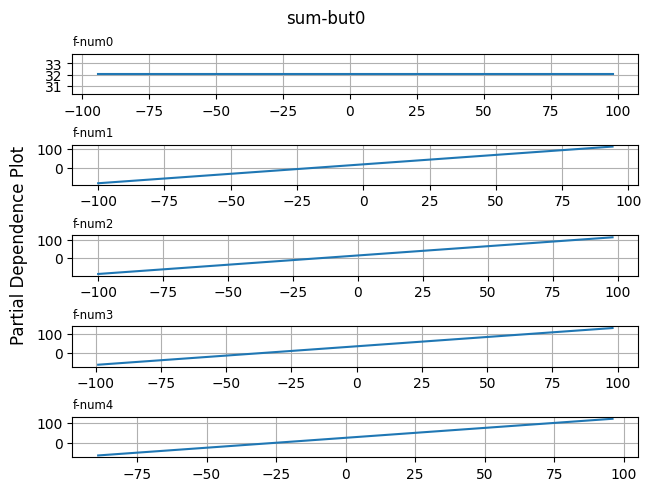

In [6]:
pdp_results.plot()

Generate some additional random data, using _sklearn_ library, that can be more suited for classification tasks.
Features are still numerical.

In [7]:
def create_random_dataframe_classifier():
    X, _ = make_classification(n_samples=5000, n_features=5, n_classes=2,
                               n_clusters_per_class=2, class_sep=2, flip_y=0, random_state=23)

    return pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'x3': X[:, 2],
        'x4': X[:, 3],
        'x5': X[:, 4],
    })

In [8]:
df = create_random_dataframe_classifier()
df.head()

,x1,x2,x3,x4,x5
0,-2.124064,1.608138,-0.404920,0.942188,-2.754050
1,3.048919,-2.428100,0.427166,-1.466329,4.053088
2,2.241751,-2.109687,-0.410332,-1.386671,3.250637
3,3.299680,-1.386333,0.149882,-0.406165,3.351016
4,2.226471,-0.992053,-0.475162,-0.327913,2.308332


Initialize a simple classifier that performs linear combination of its weights and input features.
The model returns `true` whether the output is bigger than a predetermined _threshold_.

In [9]:
class_model = TestModels.getLinearThresholdModel([0.1, 0.2, 0.3, 0.4, 0.5], 0)

Generate results for partial dependence on the classification model and generated data and visualize them in a `pd.DataFrame`.

In [10]:
class_pdp_results = pdp_explainer.explain(class_model, df)
class_pdp_results.as_dataframe()

,-4.018459,-3.245789,-3.207906,-3.107450,-2.979096,-2.542812,-2.430370,-2.320602,-2.245775,-2.204837,...,2.864052,2.981933,2.985034,2.999498,3.029861,3.101296,3.434164,3.638865,4.012192,4.256310
0,false,false,false,false,false,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,true,true,true,true,true,true,true,true,true,true


Plot the partial dependence information.

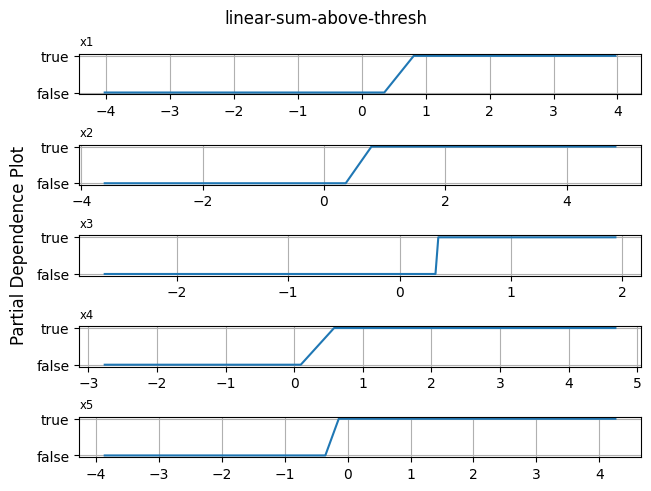

In [11]:
class_pdp_results.plot()